# Assignment: Trees
Do three questions (Q1-3).

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

They are constructed through the repeated action of splitting the data into subsets based on certain characteristics or rules (as this action is repeated the subsets get smaller and smaller, usually until a subset is "pure," but you could stop before that too). They are called 'trees' because as the data is split, it looks like a tree branch diverging from its root/trunk (which represented the full dataset together). Then at the next split, it resembles leaves divergng from the branch it grows on, et cetera.

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

Trees handle non-linear relationships better by splitting the data into different groups (even numerical variables) instead of just assuming a straight-line correlation the way linear models do. Linear models try to fit a single equation to all the data, which doesn't work well with a lot of real life data as things don't always work perfectly. With trees they divide the data into different groups as analysis so relationships can be more complex as there are more specific splits, so they work better than a linear model that uses an overarching continuous (usually numerical) scale.

3. Why is the Gini a good loss function for categorical target variables?

It is because the Gini helps us determine how "mixed" a group is. If a group is pure (all have the same class and no other ones), the Gini index is 0. If the group is a mix of different categories, the index is higher (max 1). Since one of the main points of constructing a tree is make pure groups, I think the Gini is useful for deciding how good a split is.

4. Why do trees tend to overfit, and how can this tendency be constrained?

Trees tend to overfit because they keep splitting the data until every group is really small, which makes the tree fit the training data almost completely perfectly. This means it won’t work as well on new data since it has its own local variations. This tendency can be constrained by setting limits that can stop splits when groups get too small to prevent overfitting.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

False, because trees can handle both categorical and numerical variable very wells. They work well with categorical features because they split based on categories, but they can also handle numbers by making splits at certain values.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

Most trees use binary splits (i.e. two branches) because it makes the decision process simpler and more direct and keeps the tree from growing too fast. If each split had lots of branches, then the tree could become too complicated and hard to manage.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

The tree is probably over-fitting if a tree has lots of tiny splits, and if the tree is shallow and doesn’t split much, then it will probably underfit. Another huge sign of overfitting is if the tree and predict really well on training data but does so poorly on new testing data.

---

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ds3021_cars.csv to ds3021_cars.csv


#### Part 1

In [3]:
cars = pd.read_csv('ds3021_cars.csv')

In [4]:
num_rows, num_cols = cars.shape  # shape of the dataset
print(f"Number of observations: {num_rows}, Number of features: {num_cols}")
print("Available variables:", list(cars.columns))  # printing column names
print(cars.head()) # to see first few rows

Number of observations: 976, Number of features: 12
Available variables: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']
   Unnamed: 0        Make  Make_Year   Color  ... Fuel_Type  Transmission Transmission_Type   Price
0           1  Volkswagen       2017  silver  ...    diesel       7-Speed         Automatic  657000
1           2     Hyundai       2016     red  ...    petrol       5-Speed            Manual  682000
2           3       Honda       2019   white  ...    petrol       5-Speed            Manual  793000
3           4     Renault       2017  bronze  ...    petrol       5-Speed            Manual  414000
4           5     Hyundai       2017  orange  ...    petrol       5-Speed            Manual  515000

[5 rows x 12 columns]


#### Part 2

In [11]:
categorical_vars = ["Make", "Color", "Body_Type", "No_of_Owners", "Fuel_Type", "Transmission", "Transmission_Type"]
numeric_vars = ["Mileage_Run", "Make_Year", "Seating_Capacity"]
target_var = "Price"

encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop first category so we can avoid multicollinearity
dummy_vars = pd.DataFrame(encoder.fit_transform(cars[categorical_vars]), columns=encoder.get_feature_names_out())

# merge the encoded features with numeric features
X = pd.concat([dummy_vars, cars[numeric_vars]], axis=1)
y = cars[target_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80-20 split

#### Part 3

In [12]:
# finding the optimal min_samples_leaf
min_leaf_values = range(1, 26)
train_scores = []
test_scores = []

for min_samples in min_leaf_values:
    model = DecisionTreeRegressor(min_samples_leaf=min_samples, random_state=42)
    model.fit(X_train, y_train)

    # calculating R^2 on train and test sets
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, model.predict(X_test))

    train_scores.append(train_r2)
    test_scores.append(test_r2)

# looking for the highest test R^2
best_min_samples = min_leaf_values[np.argmax(test_scores)]
print(f"Optimal min_samples_leaf: {best_min_samples}, Max R^2 on test set: {max(test_scores)}")

Optimal min_samples_leaf: 5, Max R^2 on test set: 0.8253410511223336


#### Part 4

Decision Tree R^2: 0.8253410511223336, RMSE: 141536.54096868183


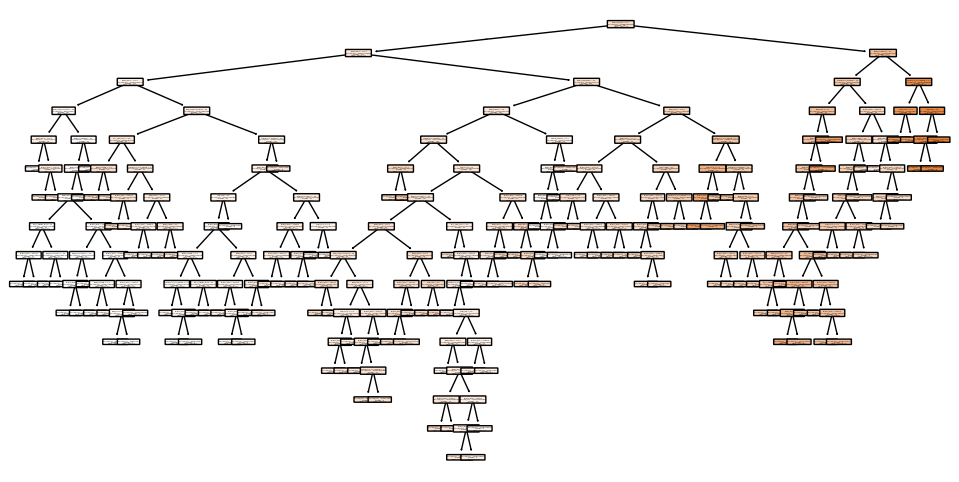

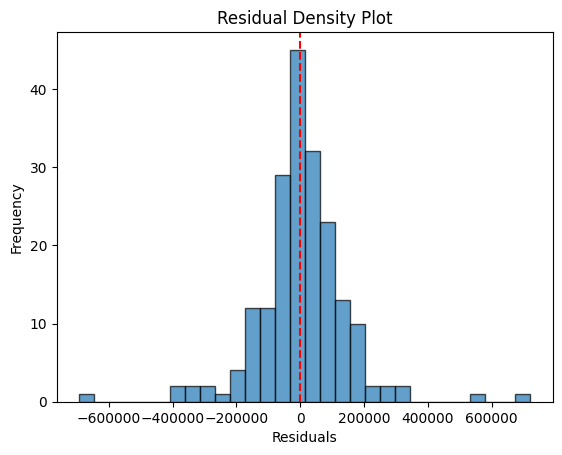

In [14]:
# training the optimal model
best_model = DecisionTreeRegressor(min_samples_leaf=best_min_samples, random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

# compute R^2 and RMSE
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Decision Tree R^2: {r2_test}, RMSE: {rmse_test}")

# graphing dendrogram
plt.figure(figsize=(12, 6))
plot_tree(best_model, filled=True, feature_names=X.columns, rounded=True)
plt.show()

# residual plot
residuals = y_test - y_pred
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Density Plot")
plt.show()

In [16]:
# train a linear regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lr = lin_model.predict(X_test)

# calculating R^2 and RMSE for linear regression
r2_test_lr = r2_score(y_test, y_pred_lr)
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression R^2: {r2_test_lr}, RMSE: {rmse_test_lr}")

# compare models
if r2_test > r2_test_lr:
    print("Decision tree performed better!")
else:
    print("Linear regression performed better!")

Linear Regression R^2: 0.8202733305994345, RMSE: 143575.196605685
Decision tree performed better!


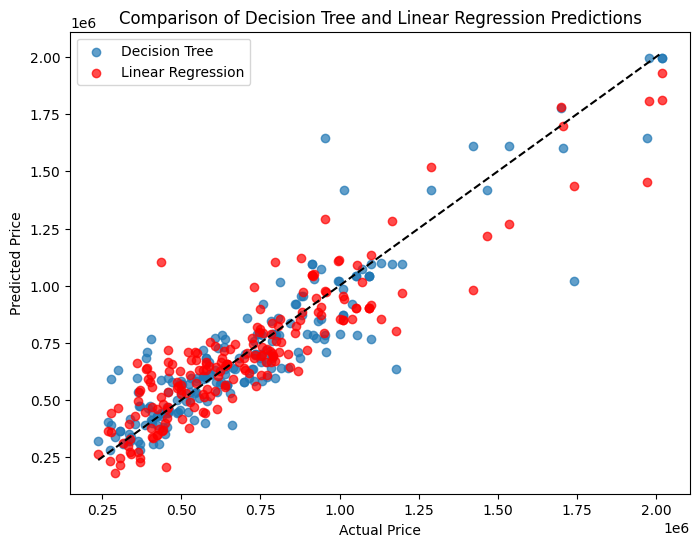

In [17]:
# scatter plot of predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Decision Tree', alpha=0.7)
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.7, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.title("Comparison of Decision Tree and Linear Regression Predictions")
plt.show()

They look pretty similar and are both pretty accurate. Yay!

---

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [18]:
from google.colab import files
uploaded = files.upload()

Saving Breast Cancer METABRIC.csv to Breast Cancer METABRIC.csv


In [19]:
cancer = pd.read_csv('Breast Cancer METABRIC.csv')

In [20]:
cancer_num_rows, cancer_num_cols = cancer.shape  # shape of the dataset
print(f"Number of observations: {cancer_num_rows}, Number of features: {cancer_num_cols}")
print("Available variables:", list(cancer.columns))  # printing column names
print(cancer.head()) # to see first few rows

Number of observations: 2509, Number of features: 34
Available variables: ['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade', 'HER2 status measured by SNP6', 'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality', 'Lymph nodes examined positive', 'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code', 'Overall Survival (Months)', 'Overall Survival Status', 'PR Status', 'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status', 'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage', "Patient's Vital Status"]
  Patient ID  Age at Diagnosis  ... Tumor Stage Patient's Vital Status
0    MB-0000             75.65  ...         2.0                 Living
1    MB-0002             43.19

In [21]:
categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numeric_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
target_var = 'Price'

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(cars[categorical_vars])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_vars))

X = pd.concat([categorical_encoded_df, cars[numeric_vars]], axis=1)
y = cars[target_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute sensitivity and specificity
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
print(f"Sensitivity (TPR): {TPR}, Specificity (TNR): {TNR}")

Decision Tree Accuracy: 0.04081632653061224
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Sensitivity (TPR): nan, Specificity (TNR): nan


<ipython-input-31-d5e56fc03b2f>:19: RuntimeWarning: invalid value encountered in scalar divide
  TPR = TP / (TP + FN)
<ipython-input-31-d5e56fc03b2f>:20: RuntimeWarning: invalid value encountered in scalar divide
  TNR = TN / (TN + FP)


Optimal min_samples_leaf: 5 with R²: 0.8253410511223336
Decision Tree R²: 0.8253410511223336, RMSE: 141536.54096868183


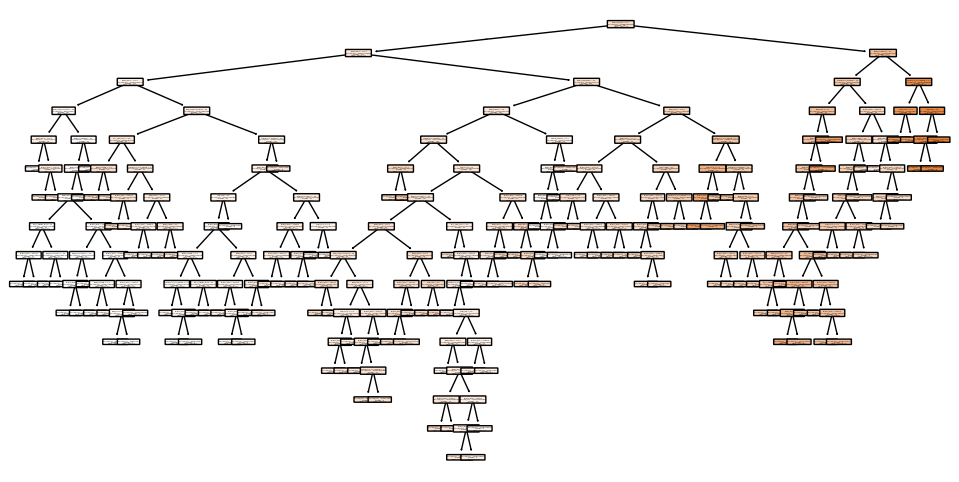

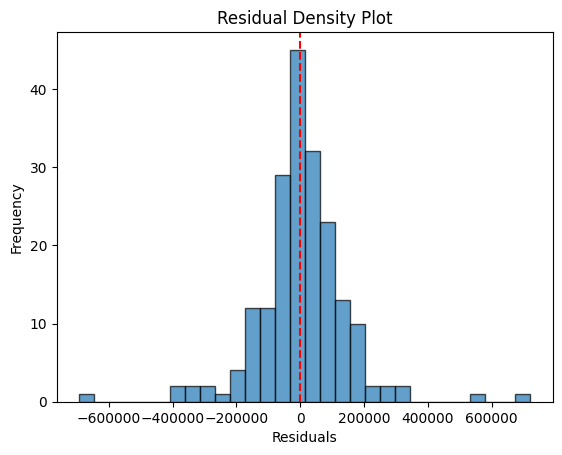

In [24]:
best_r2 = float('-inf')
best_min_samples = None
for min_samples in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=min_samples, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_min_samples = min_samples

print(f"Optimal min_samples_leaf: {best_min_samples} with R²: {best_r2}")

# train optimal model
best_model = DecisionTreeRegressor(min_samples_leaf=best_min_samples, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# compute R² and RMSE
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Decision Tree R²: {r2_test}, RMSE: {rmse_test}")

# graphing dendrogram
plt.figure(figsize=(12, 6))
plot_tree(best_model, filled=True, feature_names=X.columns, rounded=True)
plt.show()

# residual plot
residuals = y_test - y_pred
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Density Plot")
plt.show()

Linear Regression R²: 0.8202733305994345, RMSE: 143575.196605685


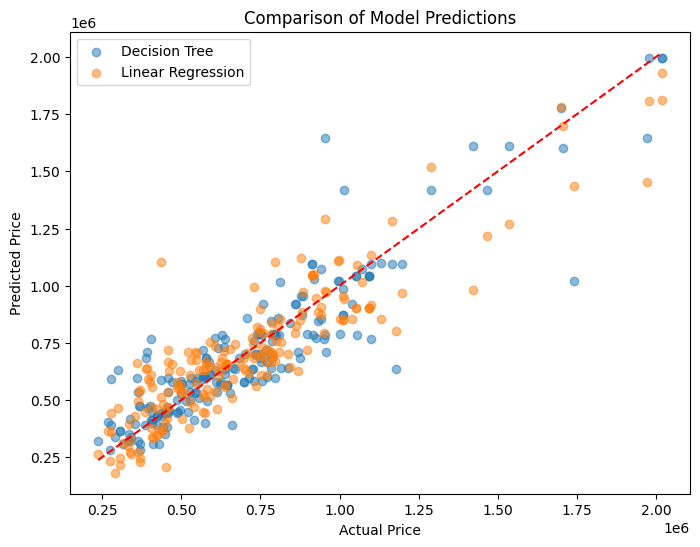

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# calculating R² and RMSE
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print(f"Linear Regression R²: {r2_lin}, RMSE: {rmse_lin}")

# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Decision Tree', alpha=0.5)
plt.scatter(y_test, y_pred_lin, label='Linear Regression', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.title("Comparison of Model Predictions")
plt.show()
